In [1]:
import plotly
import plotly.graph_objs as go
import os
import pandas as pd
import matplotlib.pyplot as plt

log_file = "logs_3_dec"
log_directory = os.path.join(os.path.expanduser('~'), f"sim_loop/results/logs/{log_file}")
output_file = f'{log_directory}/compiled_log_data.csv'
df_3 = pd.read_csv(output_file)

log_file = "logs_5_dec"
log_directory = os.path.join(os.path.expanduser('~'), f"sim_loop/results/logs/{log_file}")
output_file = f'{log_directory}/compiled_log_data.csv'
df_5 = pd.read_csv(output_file)

log_file = "logs_7_dec"
log_directory = os.path.join(os.path.expanduser('~'), f"sim_loop/results/logs/{log_file}")
output_file = f'{log_directory}/compiled_log_data.csv'
df_7 = pd.read_csv(output_file)

log_directory = os.path.join(os.path.expanduser('~'), "sim_loop/results/CC_human_driver_cut_in")
output_file = f'{log_directory}/CC_human_driver_cut_in.csv'
df_cc_human_driver = pd.read_csv(output_file)

In [ ]:
# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

trace_3_c = go.Scatter3d(
    x=df_3['v_delta'][df_3['CollisionDetected']],
    y=df_3['s_delta'][df_3['CollisionDetected']],  
    z=[3]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'red',
    }
)

trace_3_nc = go.Scatter3d(
    x=df_3['v_delta'][~df_3['CollisionDetected']],
    y=df_3['s_delta'][~df_3['CollisionDetected']],  
    z=[3]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'green',
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

trace_5_c = go.Scatter3d(
    x=df_5['v_delta'][df_5['CollisionDetected']],
    y=df_5['s_delta'][df_5['CollisionDetected']],  
    z=[5]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'red',
    }
)

trace_5_nc = go.Scatter3d(
    x=df_5['v_delta'][~df_5['CollisionDetected']],
    y=df_5['s_delta'][~df_5['CollisionDetected']],  
    z=[5]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'green',
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

trace_7_c = go.Scatter3d(
    x=df_7['v_delta'][df_7['CollisionDetected']],
    y=df_7['s_delta'][df_7['CollisionDetected']],  
    z=[7]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'red',
    }
)

trace_7_nc = go.Scatter3d(
    x=df_7['v_delta'][~df_7['CollisionDetected']],
    y=df_7['s_delta'][~df_7['CollisionDetected']],  
    z=[7]*416,  
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color': 'green',
    }
)

trace_cc_human_driver = go.Scatter3d(
    x=df_cc_human_driver['v_delta'][df_cc_human_driver['collision']],
    y=df_cc_human_driver['s_delta'][df_cc_human_driver['collision']],
    z=df_cc_human_driver['ego_max_dec'][df_cc_human_driver['collision']],
    mode='markers',
    marker={
        'size': 4,
        'opacity': 0.8,
        'color': 'red',
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

#data = [trace_3_c, trace_3_nc, trace_5_c, trace_5_nc, trace_7_c, trace_7_nc, trace_cc_human_driver]
data = [trace_cc_human_driver]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis_title='v_delta [km/h]',  # Title for the x-axis
        yaxis_title='s_delta [m]',  # Title for the y-axis
        zaxis_title='maximum deceleration [m/s²]'   # Title for the z-axis
    )
)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Analyzing the human driver model case of collision

In [ ]:
import seaborn as sns

df = df_cc_human_driver[df_cc_human_driver['collision']].drop('collision', axis=1)
sns.jointplot(data=df, x="v_delta", y="s_delta", kind="kde", hue="ego_max_dec") #hue="ego_max_dec",

In [ ]:
sns.jointplot(data=df, x="v_delta", y="ego_max_dec", kind="kde")

In [ ]:
sns.jointplot(data=df, x="s_delta", y="ego_max_dec", kind="kde")

In [ ]:
df = df_cc_human_driver[df_cc_human_driver['collision']]
df = df.drop('collision', axis=1)
# Min-Max Normalization
df_norm = (df-df.min())/(df.max()-df.min())
 
print("Scaled Dataset Using Pandas")
df_norm.head()
df_norm.cov()

In [ ]:
df.corr()

In [ ]:
# Basic correlogram
#sns.pairplot(df)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df)
Scaled_data=scaling.transform(df)
 
# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)
total_explained_variance_ratio = principal.explained_variance_ratio_.sum()
print(total_explained_variance_ratio)

# Boundary between collision and no collision for the human driver model

In [ ]:
sns.scatterplot(data=df_cc_human_driver[df_cc_human_driver['ego_max_dec']==7], x="s_delta", y="v_delta", hue="collision")

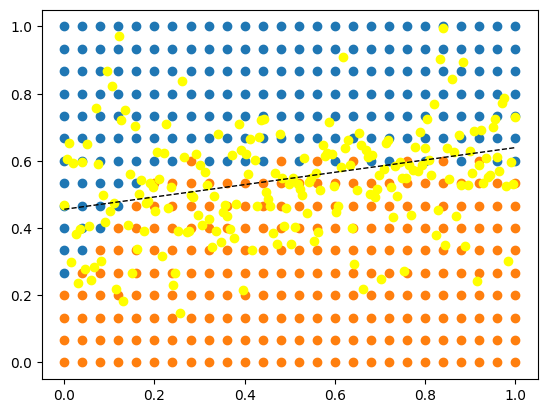

In [36]:
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

df = df_cc_human_driver[df_cc_human_driver['ego_max_dec']==3]

# Min-Max Normalization
df = df.drop('collision', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm['collision'] = df_cc_human_driver['collision']
df = df_norm

feature_cols = ['s_delta', 'v_delta']
X = df[feature_cols] # Features
y = df.collision # Target variable

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 1
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

#collision
df_coll = df[df['collision']]
plt.scatter(df_coll['s_delta'], df_coll['v_delta'])

#no collision
df_coll = df[~df['collision']]
plt.scatter(df_coll['s_delta'], df_coll['v_delta'])

# Sample points along regression line.
# Add noise (variance) to the y-values
x_values = np.linspace(0,1,200)
variance = 0.025  # Variance of the noise
noise = np.random.normal(0, np.sqrt(variance), len(x_values))
y_values = m * x_values + c
yd_noise = y_values + noise
plt.scatter(x_values, yd_noise, color='yellow')

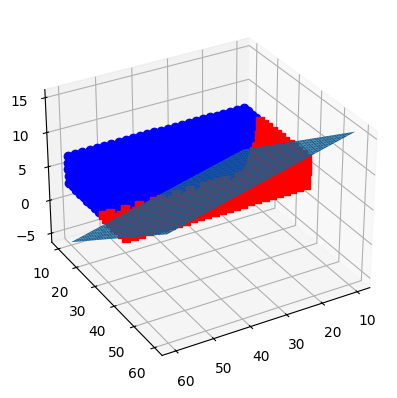

In [2]:
from sklearn.svm import SVC
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

feature_cols = ['s_delta', 'v_delta', 'ego_max_dec']
X = df_cc_human_driver[feature_cols] # Features
Y = df_cc_human_driver.collision # Target variable

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(10,60,30)
x,y = np.meshgrid(tmp,tmp)

df_coll = df_cc_human_driver[~df_cc_human_driver['collision']]
df_no_coll = df_cc_human_driver[df_cc_human_driver['collision']]

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(df_coll['s_delta'], df_coll['v_delta'], df_coll['ego_max_dec'],'ob')
ax.plot3D(df_no_coll['s_delta'], df_no_coll['v_delta'], df_no_coll['ego_max_dec'],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()